In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2022-07-28 02:34:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.217.15.112, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2022-07-28 02:34:52 (98.8 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [4]:
!ls /tmp/

bbc-text.csv
dap_multiplexer.77550962c8e5.root.log.INFO.20220728-023126.43
dap_multiplexer.INFO
debugger_1lz1pm9gor
initgoogle_syslog_dir.0
pyright-95-0QzxFEZka2DJ
pyright-95-PEW4qmoiZQj8
python-languageserver-cancellation


In [5]:
import pandas as pd
testDF = pd.read_csv('/tmp/bbc-text.csv') 
testDF

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [6]:
testDF.describe(include='all')

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [7]:
testDF.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [15]:
sentences = []
labels = []
stopwords = ["s","i", "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

155


In [16]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " " # ' about '
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainmen

In [17]:
labels

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'business',
 'politics',
 'sport',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'tech',
 'tech',
 'sport',
 'sport',
 'tech',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'entertainment',
 'politics',
 'tech',
 'entertainment',
 'entertainment',
 'business',
 'politics',
 'tech',
 'entertainment',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'sport',
 'tech',
 'entertainment',
 'politics',
 'politics',
 'politics',
 'business',
 'sport',
 'politics',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'sport',
 'business',
 'sport',
 'business',
 'tech',
 'business',
 'entertainment',
 'tech',
 'business',
 'politics',
 'business',
 'politics',
 'sport',
 'business',
 'tech',
 'business',
 'sport',
 'sport',
 'business',
 'business',
 'spo

In [18]:
sentences

['tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us ne

In [19]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [20]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [21]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'said': 2, 'will': 3, 'not': 4, 'mr': 5, 'year': 6, 'also': 7, 'people': 8, 'new': 9, 'us': 10, 'one': 11, 'can': 12, 'last': 13, 't': 14, 'first': 15, 'time': 16, 'two': 17, 'government': 18, 'world': 19, 'now': 20, 'uk': 21, 'best': 22, 'years': 23, 'no': 24, 'make': 25, 'just': 26, 'film': 27, 'told': 28, 'made': 29, 'get': 30, 'music': 31, 'game': 32, 'like': 33, 'back': 34, 'many': 35, '000': 36, 'labour': 37, 'three': 38, 'well': 39, '1': 40, 'next': 41, 'bbc': 42, 'take': 43, 'set': 44, 'number': 45, 'added': 46, 'way': 47, 'market': 48, '2': 49, 'company': 50, 'may': 51, 'says': 52, 'election': 53, 'home': 54, 'off': 55, 'party': 56, 'good': 57, 'going': 58, 'much': 59, 'work': 60, '2004': 61, 'still': 62, 'win': 63, 'show': 64, 'think': 65, 'games': 66, 'go': 67, 'top': 68, 'second': 69, 'won': 70, 'million': 71, '6': 72, 'england': 73, 'firm': 74, 'since': 75, 'week': 76, 'say': 77, 'play': 78, 'part': 79, 'public': 80, 'use': 81, 'blair': 82, '3': 83, 'want': 84

In [22]:

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

443
120
196
120
186
120


In [23]:
train_padded[7]

array([  1, 695,   1,   1, 154,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1, 174, 323, 149,   1,   1,   1,   1,   1,   1, 142,  13,
       111, 163, 106,  72,  91, 385,  93,  45,  11,   1, 959, 838, 485,
       263,  58,  49, 337,  69,  44,   1,   1,   1,   1,   1,   1, 151,
        34, 593,   1, 548,   1,  63,   1, 298, 126,   1,   1,   1,   1,
         1,   1,   1, 149, 142, 458,   1,   1, 645,  72,  91,  72,  91,
         1,   1, 233,   1,   1,   1, 674,   1,   1, 263,   1,   1,   1,
         2,   1,   1,   1,  14,  43, 286,   1,   1,  10,  78,   1, 100,
        32,   1, 114,  55,   1,   1,   1,  14,   1, 749, 467,  20, 119,
        14,   1,   1], dtype=int32)

In [24]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [25]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [26]:
training_label_seq

array([[4],
       [2],
       [1],
       ...,
       [1],
       [2],
       [5]])

In [27]:
label_tokenizer.word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 2s - loss: 1.7639 - accuracy: 0.3461 - val_loss: 1.7257 - val_accuracy: 0.4067 - 2s/epoch - 39ms/step
Epoch 2/30
56/56 - 0s - loss: 1.6819 - accuracy: 0.4084 - val_loss: 1.6290 - val_accuracy: 0.4112 - 238ms/epoch - 4ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5746 - accuracy: 0.4388 - val_loss: 1.5238 - val_accuracy: 0.4067 - 223ms/epoch - 4ms/step
Epoch 4/30
56/56 - 0s - loss: 1.4453 - accuracy: 0.5303 - val_loss: 1.3894 - val_accuracy: 0.5820 - 166ms/epoch - 3ms/step
Epoch 5/30
56/56 - 0s - loss: 1.2779 - accuracy: 0.6590 - val_loss: 1.2222 - val_accuracy: 0.6562 - 204ms/epoch - 4ms/step
Epoch 6/30
56/56 - 0s - loss: 1.0859 - accuracy: 0.7449 - val_loss: 1.0410 - val_accuracy: 0.7438 - 230ms/epoch - 4ms/step
Epoch 7/30
56/56 - 0s - loss: 0.8998 - accuracy: 0.8225 - val_loss: 0.8757 - val_accuracy: 0.8427 - 192ms/epoch - 3ms/step
Epoch 8/30
56/56 - 0s - loss: 0.7377 - accuracy: 0.8966 - val_loss: 0.7381 - val_accuracy: 0.8854 - 221ms/epoch - 4ms/step
Epoch 9/30
56/56 -

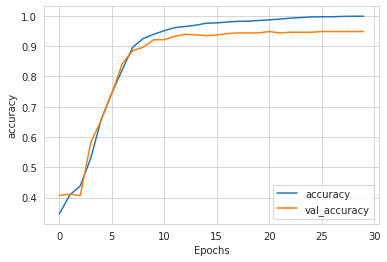

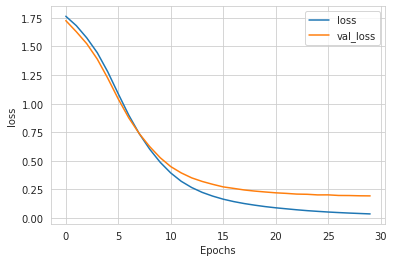

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")